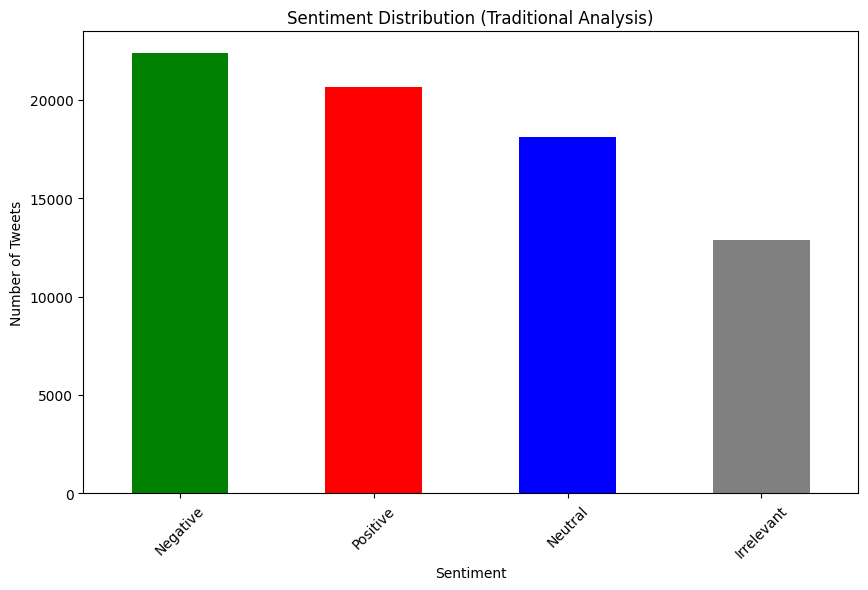

<Figure size 1200x800 with 0 Axes>

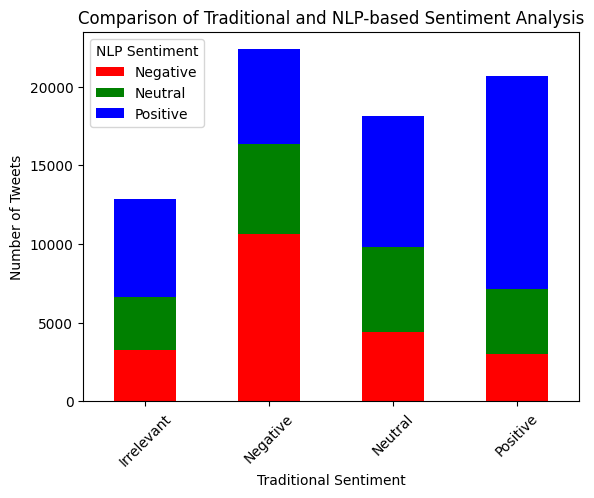

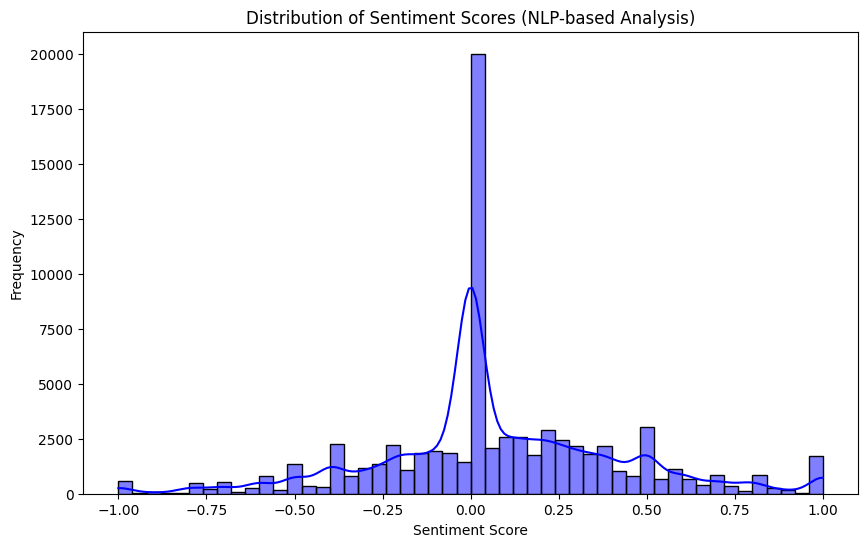

Summary of Sentiment Scores:
count    73996.000000
mean         0.076789
std          0.356014
min         -1.000000
25%         -0.070035
50%          0.000000
75%          0.275000
max          1.000000
Name: Sentiment_Score, dtype: float64

Top 5 Most Positive Tweets:
174             Platinum is the best loot @Borderlands  
175             Platinum is the best booty @ Borderlands
176               Platinum is the best lot @ Borderlands
177              Platinum has the best loot @Borderlands
178    Platinum Rock is named the best loot @Borderlands
Name: Tweet Content, dtype: object

Top 5 Most Negative Tweets:
147                                "What terrible bitch!"
1007    made @EpicGames @2K why add crossplay for it 3...
2069    what is the horrible thing ever've ever made.....
2501    The dreaded Evil Bot •. sniper for @NioxSnipin...
3366                        .  worst mastery camo to date
Name: Tweet Content, dtype: object


In [2]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("twitter_training.csv", header=None, names=['Tweet ID', 'Entity', 'Sentiment', 'Tweet Content'])

# Drop rows with missing values
df.dropna(inplace=True)

# Traditional Sentiment Analysis
# Assuming the 'Sentiment' column contains the sentiment labels (Positive, Negative, Neutral, Irrelevant)
sentiment_counts = df['Sentiment'].value_counts()

# Plotting the sentiment distribution
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue', 'gray'])
plt.title('Sentiment Distribution (Traditional Analysis)')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

# NLP-based Sentiment Analysis using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['NLP_Sentiment'] = df['Tweet Content'].apply(get_sentiment)

# Comparing Traditional and NLP-based Sentiment Analysis
comparison_df = df[['Sentiment', 'NLP_Sentiment']]
comparison_counts = comparison_df.groupby(['Sentiment', 'NLP_Sentiment']).size().unstack()

# Plotting the comparison
plt.figure(figsize=(12, 8))
comparison_counts.plot(kind='bar', stacked=True, color=['red', 'green', 'blue'])
plt.title('Comparison of Traditional and NLP-based Sentiment Analysis')
plt.xlabel('Traditional Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.legend(title='NLP Sentiment')
plt.show()

# Detailed Sentiment Analysis using TextBlob
def get_sentiment_score(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['Sentiment_Score'] = df['Tweet Content'].apply(get_sentiment_score)

# Plotting the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment_Score'], bins=50, kde=True, color='blue')
plt.title('Distribution of Sentiment Scores (NLP-based Analysis)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Summary of Sentiment Scores
print("Summary of Sentiment Scores:")
print(df['Sentiment_Score'].describe())

# Example of tweets with extreme sentiment scores
print("\nTop 5 Most Positive Tweets:")
print(df.nlargest(5, 'Sentiment_Score')['Tweet Content'])

print("\nTop 5 Most Negative Tweets:")
print(df.nsmallest(5, 'Sentiment_Score')['Tweet Content'])